#### Building Chatbot with Multiple Tools using LangGraph
- Both pre-built Tools by Langchain like arxiv,wikipedia search,tavly search and some custom functions like add,multiply..

In [1]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [2]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
arxiv.invoke("Attention Is All You Need")

'Published: 2021-05-06\nTitle: Do You Even Need Attention? A Stack of Feed-Forward Layers Does Surprisingly Well on ImageNet\nAuthors: Luke Melas-Kyriazi\nSummary: The strong performance of vision transformers on image classification and other vision tasks is often attributed to the design of their multi-head attention layers. However, the extent to which attention is responsible for this strong performance remains unclear. In this short report, we ask: is the attention layer even necessary? Specifi'

In [3]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.invoke("What is Agentic AI?")

'Page: AI agent\nSummary: In the context of generative artificial intelligence, AI agents (also referred to as compound AI systems or agentic AI) are a class of intelligent agents distinguished by their ability to operate autonomously in complex environments. Agentic AI tools prioritize decision-making over content creation and do not require human prompts or continuous oversight.\n\n\n\nPage: Manus (AI agent)\nSummary: Manus (meaning hand in Latin) is an autonomous artificial intelligence agent develo'

In [5]:
from dotenv import load_dotenv
load_dotenv()
import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [6]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults()

tavily.invoke("provide latest AI News as of 30th dec 2025")

C:\Users\Suresh\AppData\Local\Temp\ipykernel_30876\2572476766.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


[{'title': 'The latest AI news we announced in December - Google Blog',
  'url': 'https://blog.google/technology/ai/google-ai-updates-december-2025/',
  'content': '# The latest AI news we announced in December\n\nDec 29, 2025\n\nHere’s a recap of our biggest AI updates from December, including the launch of Gemini 3 Flash, the release of new AI verification tools in the Gemini app and the arrival of Gemini’s powerful translation capabilities in Google Translate.\n\nSuperG [...] done. [...] a text card reading "AI to help more people around the world"',
  'score': 0.9994116},
 {'title': 'Top 10 most-read AI stories of 2025 - Healthcare IT News',
  'url': 'https://www.healthcareitnews.com/news/top-10-most-read-ai-stories-2025',
  'content': '2025: The \'great tech reckoning\' and the \'real\' AI revolution(December 2024) [...] The third-most read AI story of the past year was actually written toward the tail end of \'24, as a crystal-ball look ahead to the next 12 months. "Despite the b

In [7]:
#combine all these tools in the list
tools = [arxiv, wiki, tavily]

In [8]:
#Initliaze the LLM Model

from langchain_groq import ChatGroq
llm = ChatGroq(model="llama-3.1-8b-instant")

llm_with_tools = llm.bind_tools(tools)

In [9]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

llm_with_tools.invoke([HumanMessage(content="Provide latest AI News as of 30th dec 2025")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'snxy0dm38', 'function': {'arguments': '{"query":"latest AI news 30 December 2025"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 560, 'total_tokens': 586, 'completion_time': 0.063161794, 'completion_tokens_details': None, 'prompt_time': 0.045375815, 'prompt_tokens_details': None, 'queue_time': 0.059260005, 'total_time': 0.108537609}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b704f-e030-7172-987d-34c9df4e6743-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'latest AI news 30 December 2025'}, 'id': 'snxy0dm38', 'type': 'tool_call'}], usage_metadata={'input_tokens': 560, 'output_tokens': 26, 'total_tokens': 586})

In [10]:
llm_with_tools.invoke([HumanMessage(content="What is Machine Learning?")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '5z0b1nwc4', 'function': {'arguments': '{"query":"Machine Learning"}', 'name': 'wikipedia'}, 'type': 'function'}, {'id': 't1ntq67ms', 'function': {'arguments': '{"query":"Machine Learning"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 552, 'total_tokens': 582, 'completion_time': 0.048033441, 'completion_tokens_details': None, 'prompt_time': 0.036391183, 'prompt_tokens_details': None, 'queue_time': 0.056083387, 'total_time': 0.084424624}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b7050-8a1f-71d0-86b2-21e4a99f01d9-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Machine Learning'}, 'id': '5z0b1nwc4', 'type': 'tool_call'}, {'name': 'arxiv', 'args': {'query': 'Machine Learning'}, 'id': 't1ntq67

In [11]:
llm_with_tools.invoke([HumanMessage(content="Attention is All You Need")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '93ptsr6ss', 'function': {'arguments': '{"query":"Attention is All You Need"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 552, 'total_tokens': 570, 'completion_time': 0.025367626, 'completion_tokens_details': None, 'prompt_time': 0.037517208, 'prompt_tokens_details': None, 'queue_time': 0.051043502, 'total_time': 0.062884834}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b7050-ed08-7ac3-8cca-50e20254a16d-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Attention is All You Need'}, 'id': '93ptsr6ss', 'type': 'tool_call'}], usage_metadata={'input_tokens': 552, 'output_tokens': 18, 'total_tokens': 570})

##### Entire Chatbot with LangGraph

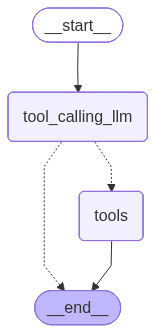

In [13]:
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display
from langgraph.prebuilt import ToolNode,tools_condition
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages


#define State Schema
class State(TypedDict):
    messages : Annotated[list[AnyMessage],add_messages]

# Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Graph Construction
graph = StateGraph(State)

#Add Nodes to Graph
graph.add_node("tool_calling_llm",tool_calling_llm)
graph.add_node("tools",ToolNode(tools))

#Add Edges to Graph
graph.add_edge(START,"tool_calling_llm")
graph.add_conditional_edges("tool_calling_llm",tools_condition)
graph.add_edge("tools",END)

#compile the graph
builder = graph.compile()

#visualize the graph
display(Image(builder.get_graph().draw_mermaid_png()))

In [14]:
messages = builder.invoke({"messages":HumanMessage(content="1706.03762")})

for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (y9xsv9eb6)
 Call ID: y9xsv9eb6
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or convolutional neural networks in an encoder-decoder configuration. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, base
